<a href="https://colab.research.google.com/github/vicotrbb/data_science/blob/master/data_visualization/create_animated_visualization_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install gif

     |████████████████████████████████| 2.2MB 4.3MB/s 
  Created wheel for gif: filename=gif-3.0.0-cp36-none-any.whl size=4817 sha256=d8ab3d5a47d8aaa83935942f19293c56e37947dadd7f150ad193a8f34b3a0054
  Stored in directory: /root/.cache/pip/wheels/33/1a/03/e7ccc13d5cbed82b0fda53a7792dfe372cf8baf691601d78d1
Successfully built gif
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gif
from datetime import datetime as dt, timedelta as td


In [3]:
plt.style.use('fivethirtyeight')

In [11]:
history = {
  "2008-01-17": 41, 
  "2008-02-28": 82, 
  "2008-03-14": 47, 
  "2008-04-13": 60, 
  "2008-05-12": 56, 
  "2008-06-11": 55, 
  "2008-07-10": 98, 
  "2008-08-19": 94, 
  "2008-09-18": 94, 
  "2008-10-27": 82, 
  "2008-11-26": 45, 
  "2008-12-25": 70,
}

In [12]:
df = pd.DataFrame(history.items(), columns=['date', 'number'])

In [13]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',drop=True, inplace=True)
df.sort_index(inplace=True)
df

,number
date,
2008-01-17,41
2008-02-28,82
2008-03-14,47
2008-04-13,60
2008-05-12,56
2008-06-11,55
2008-07-10,98
2008-08-19,94
2008-09-18,94


In [15]:
END=df.index[-1]
START=df.index[0]

@gif.frame
def plot(df,date):
    df=df.loc[df.index[0]:pd.Timestamp(date)]
    fig, (ax1) = plt.subplots(1,figsize=(20,10),dpi=100)
    ax1.plot(df.number,marker='o', linestyle='--',    linewidth=6,markersize=15, color='tab:pink')
    maxi=round(df.number.max()+5)
    ax1.set_xlim([START, END])
    ax1.set_ylim([0, maxi])

In [16]:
frames = []
for date in pd.date_range(start = START, end = END, freq='1M'):
    frame = plot(df,date)
    frames.append(frame)

In [22]:
gif.save(frames, "output.gif.png", duration=0.5 ,unit = 's')

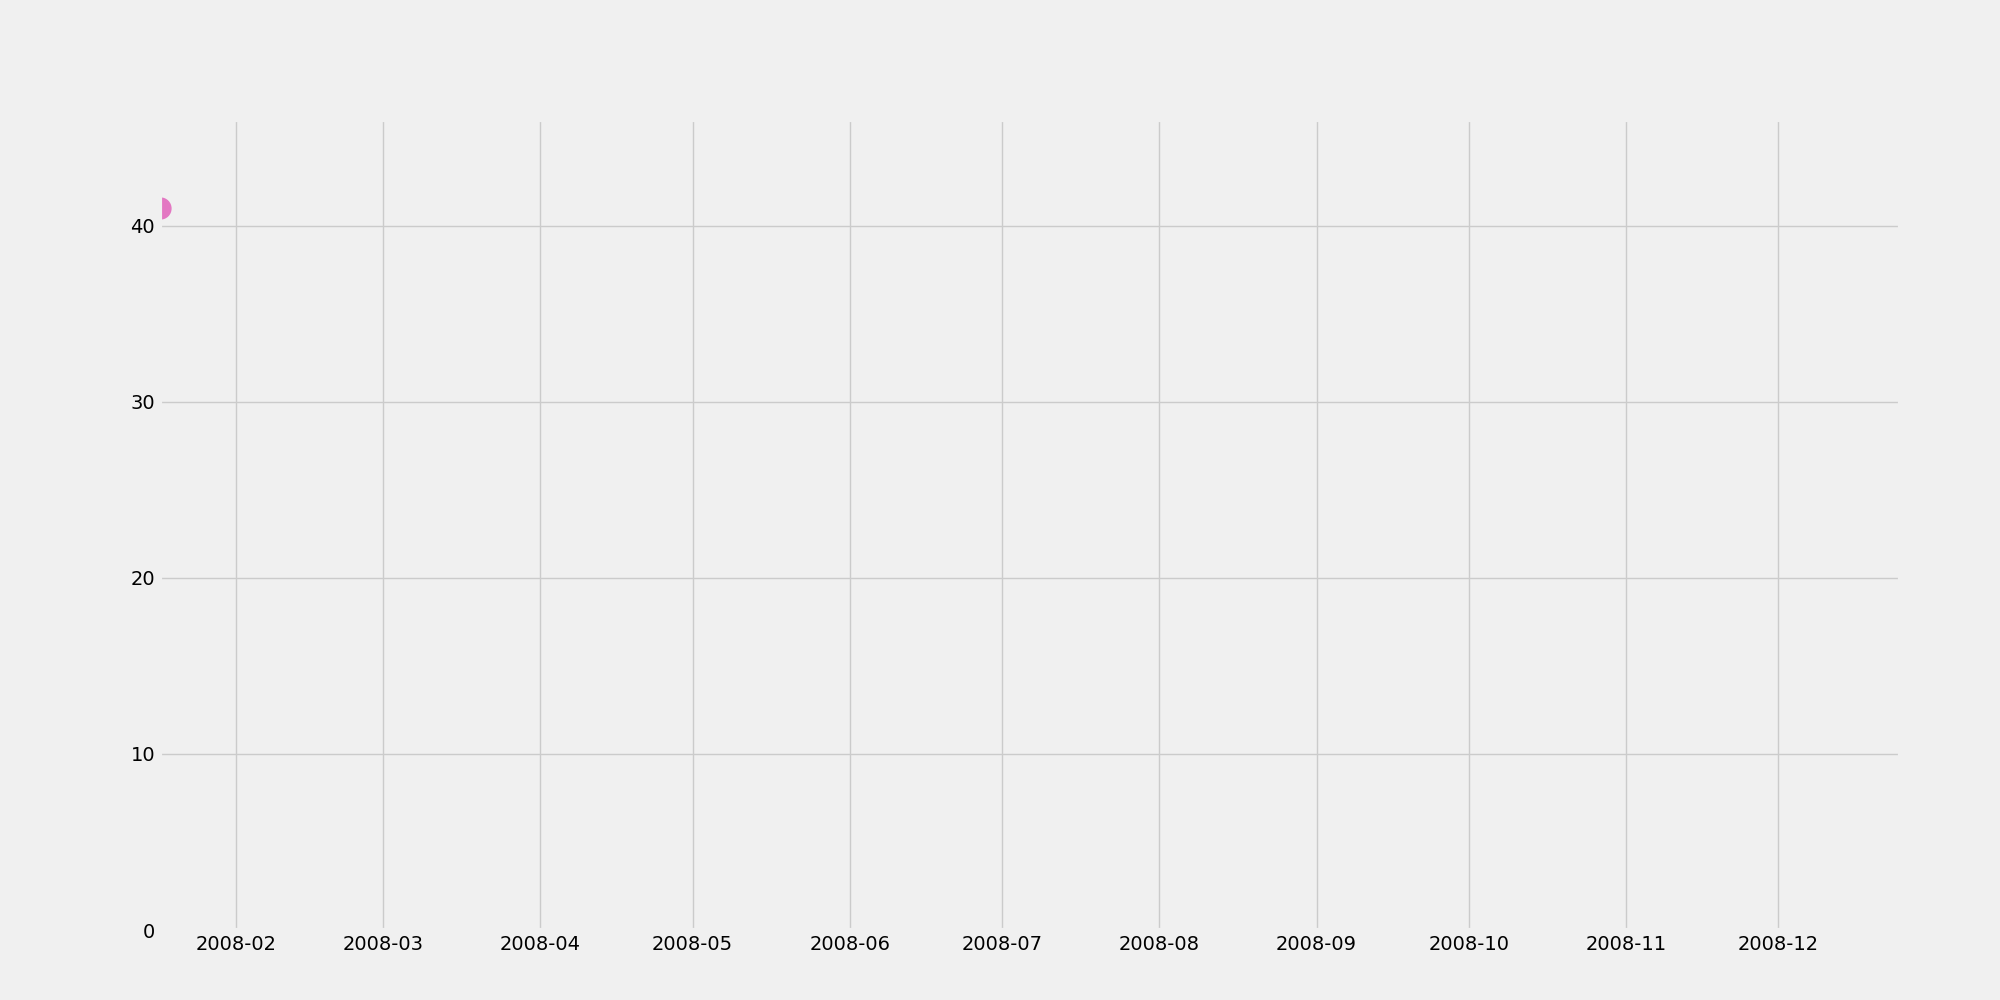

In [23]:
#visualizing the GIF
from IPython.display import Image
Image(filename="output.gif.png")